<a href="https://colab.research.google.com/github/sharan11/Intro-to-Deep-Learning-with-Pytorch-Exercise-Solutions/blob/master/conv_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Layer

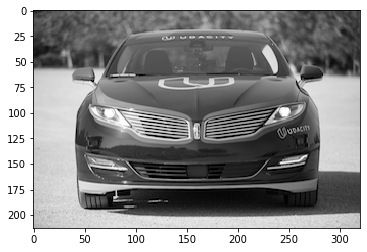

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Feel free to try out your own images here by changing img_path
# to a file path to another image on your computer!
img_path = 'udacity_sdc.png'

# load color image 
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

In [2]:
# Defining filters
import numpy as np

## TODO: Feel free to modify the numbers here, to try out another filter!
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [9]:
# Defining four different filters, 
# all of which are linear combinations of the `filter_vals` defined above

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# For an example, print out the values of filter 1
print('Filter 4: \n', filter_4)

Filter 4: 
 [[ 1  1  1  1]
 [ 1  1  1  1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]]


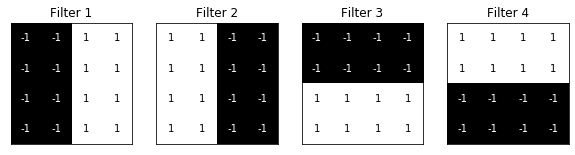

In [7]:
# visualize all four filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

## Define a convolution layer

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# define a neural network with a single convolution layer with four filters

class Net(nn.Module):
  def __init__(self, weight):
    super(Net, self).__init__()
    # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
    k_height, k_width = weight.shape[2:]
    # assumes there are 4 grayscale filters
    self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
    self.conv.weight = torch.nn.Parameter(weight)
    
  def forward(self, x):
    # calculates the output of a convolution layer
    # pre- and post-activation
    conv_x = self.conv(x)
    activated_x = F.relu(conv_x)
    
    # returns both layers
    return conv_x, activated_x
  

In [17]:
# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


In [23]:
weight.shape

torch.Size([4, 1, 4, 4])


## Visualize the output of each filter

In [0]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

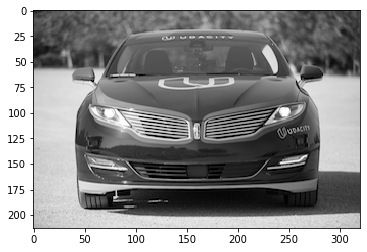

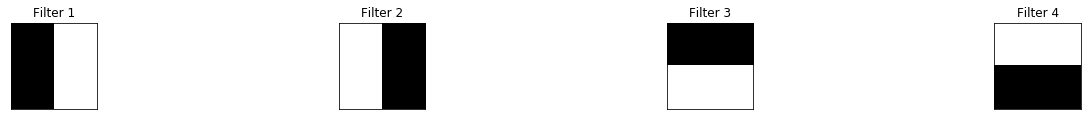

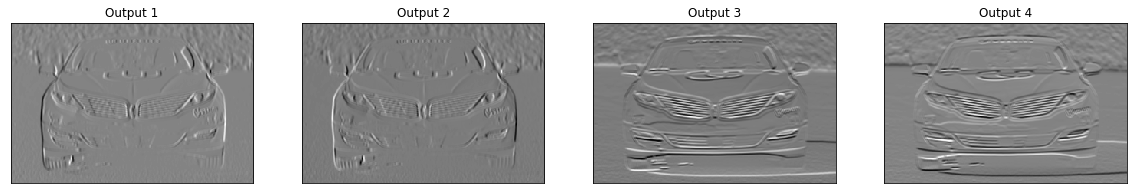

In [25]:
# plot original image
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)

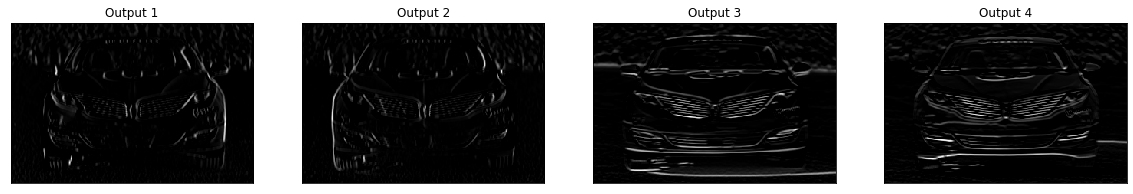

In [27]:
# after a ReLu is applied
# visualize the output of an activated conv layer
viz_layer(activated_layer)

## Adding pooling layers to the model

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# define a neural network with a single convolution layer with four filters

class Net(nn.Module):
  def __init__(self, weight):
    super(Net, self).__init__()
    # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
    k_height, k_width = weight.shape[2:]
    # assumes there are 4 grayscale filters
    self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
    self.conv.weight = torch.nn.Parameter(weight)
    # define a pooling layer
    self.pool = nn.MaxPool2d(2, 2)
    
  def forward(self, x):
    # calculates the output of a convolution layer
    # pre- and post-activation
    conv_x = self.conv(x)
    activated_x = F.relu(conv_x)
    
    # applies pooling layer
    pooled_x = self.pool(activated_x)
    
    # returns both layers
    return conv_x, activated_x, pooled_x
  

In [32]:
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


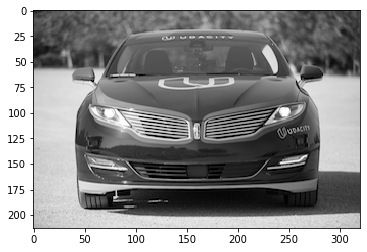

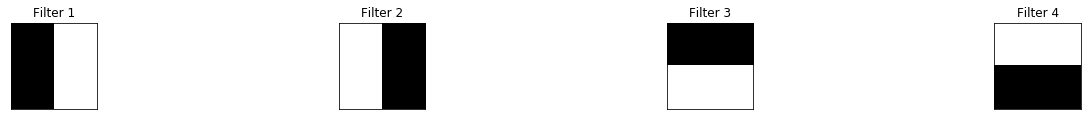

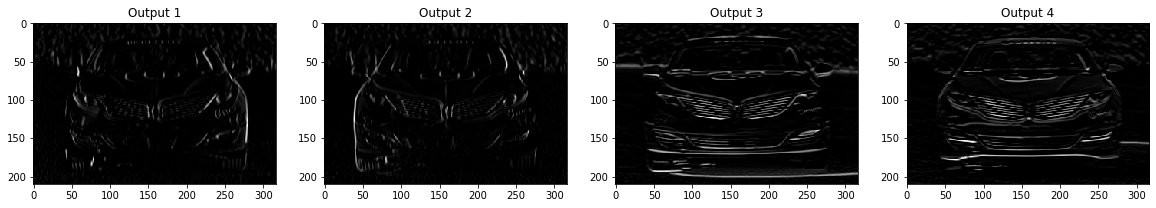

In [33]:
# plot original image
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get all the layers 
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

# visualize the output of the activated conv layer
viz_layer(activated_layer)

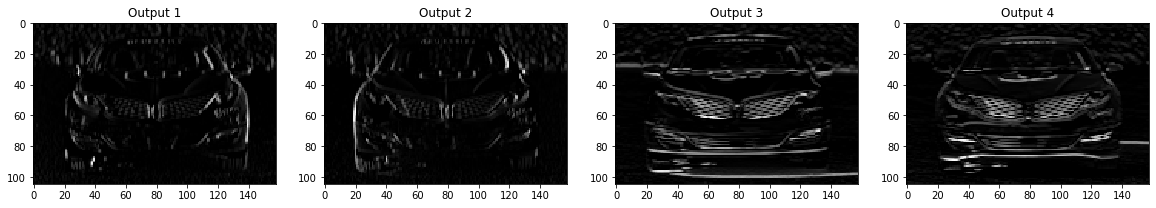

In [34]:
# visualize the output of the pooling layer
viz_layer(pooled_layer)